In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

from sklearn.preprocessing import StandardScaler,OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("datasets/audi.csv")
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0


In [3]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000
mean,2017.100675,22896.685039,24827.244001,126.011436,50.770022,1.930709
std,2.167494,11714.841888,23505.257205,67.170294,12.949782,0.602957
min,1997.000000,1490.000000,1.000000,0.000000,18.900000,0.000000
25%,2016.000000,15130.750000,5968.750000,125.000000,40.900000,1.500000
50%,2017.000000,20200.000000,19000.000000,145.000000,49.600000,2.000000
75%,2019.000000,27990.000000,36464.500000,145.000000,58.900000,2.000000
max,2020.000000,145000.000000,323000.000000,580.000000,188.300000,6.300000


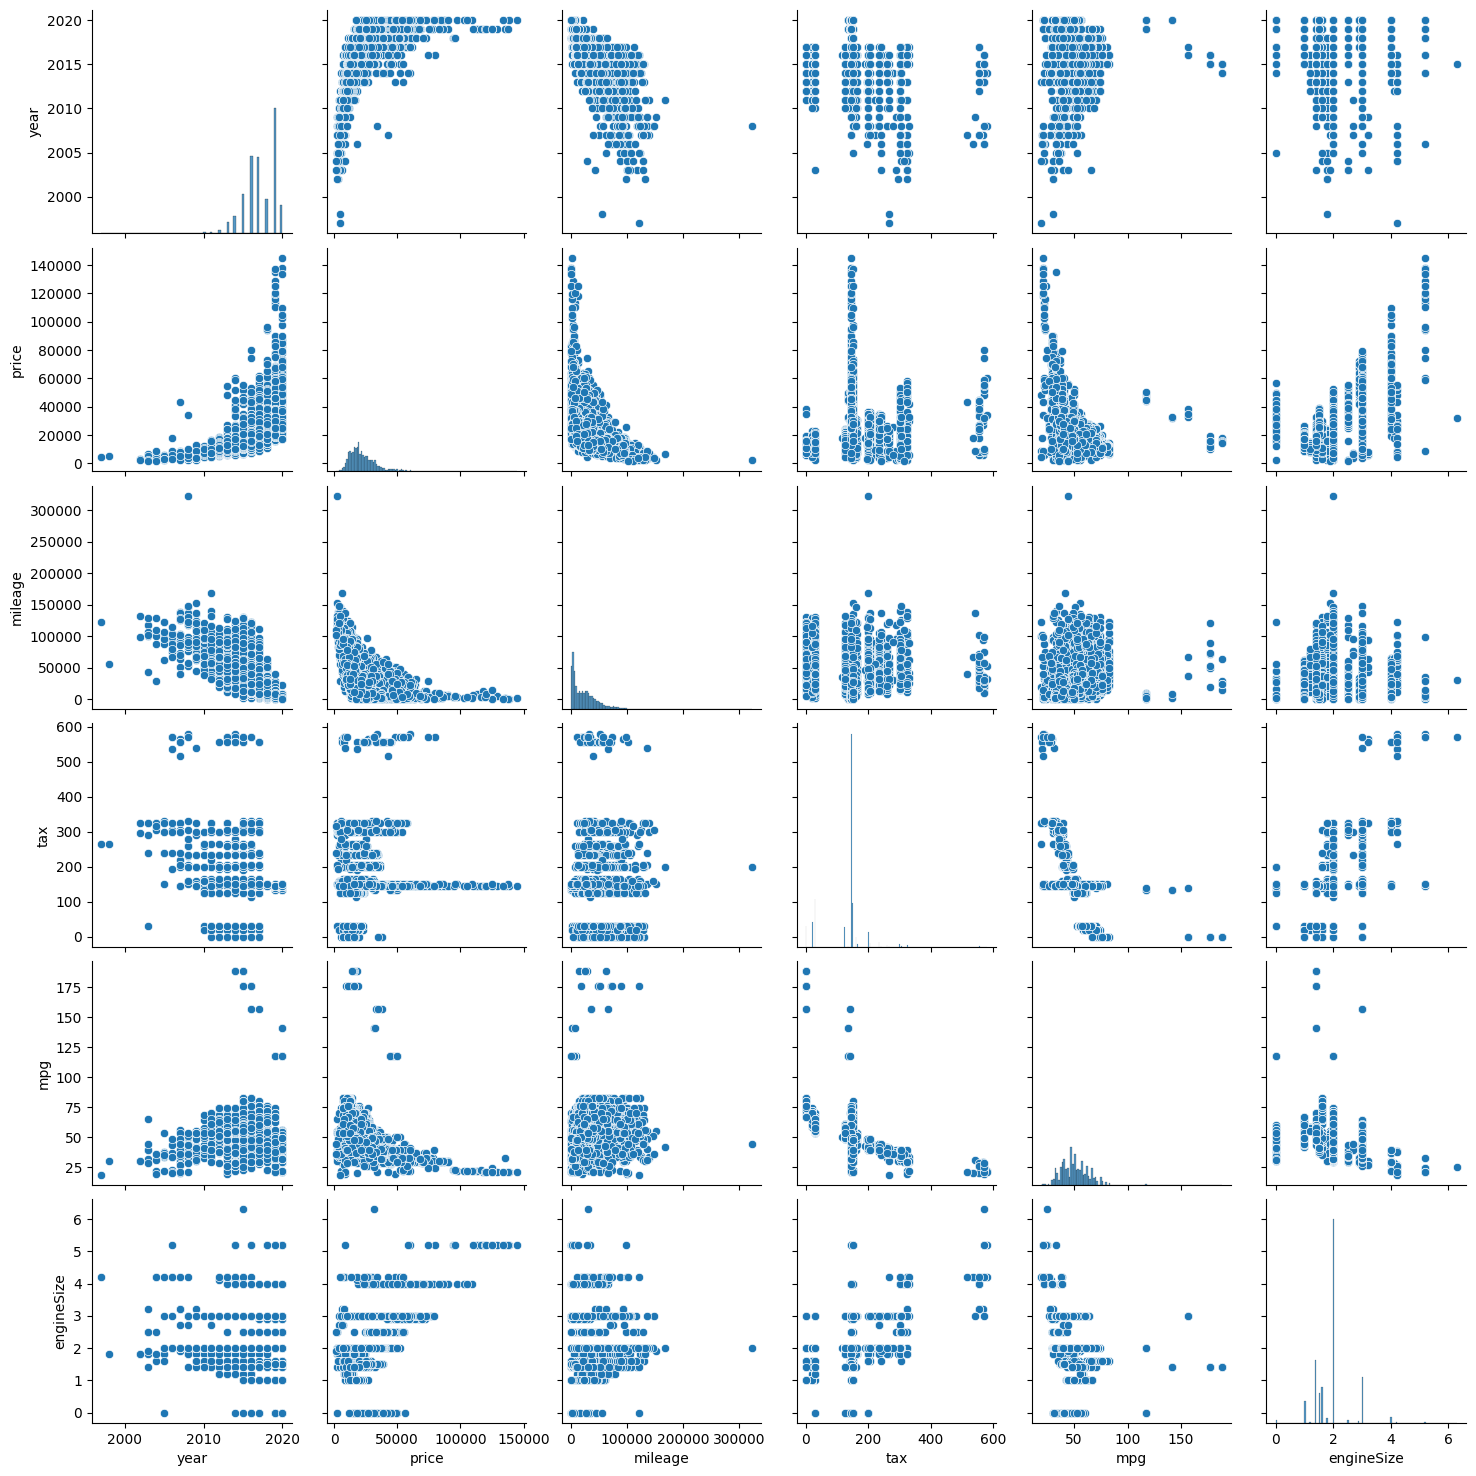

In [4]:
sns.pairplot(df)
plt.show()

In [5]:
df['transmission'].value_counts()

transmission
Manual       4369
Semi-Auto    3591
Automatic    2708
Name: count, dtype: int64

In [6]:
df['fuelType'].value_counts()

fuelType
Diesel    5577
Petrol    5063
Hybrid      28
Name: count, dtype: int64

<Figure size 800x600 with 0 Axes>

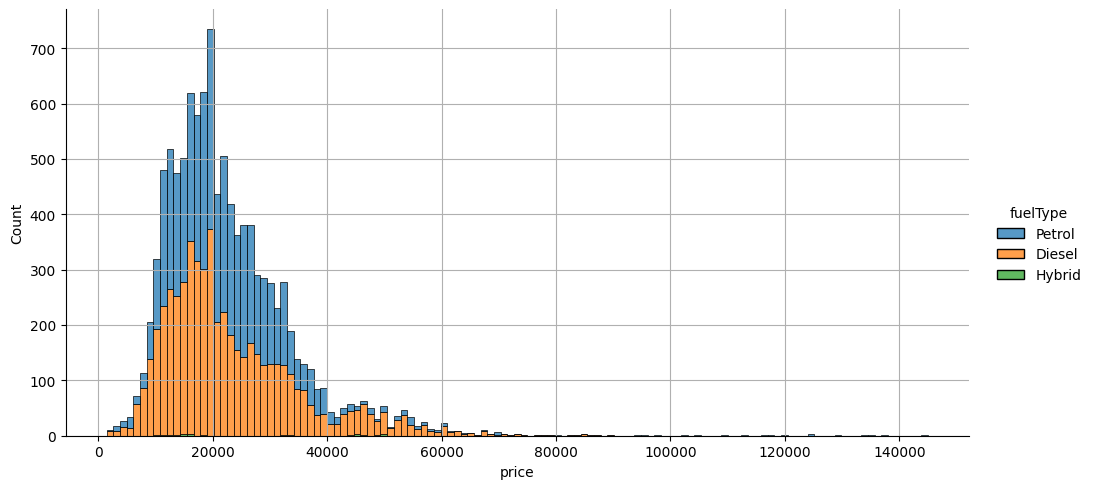

In [7]:
plt.figure(figsize=(8,6))
sns.displot(df,x=df['price'],hue='fuelType',aspect=2,multiple='stack')
plt.grid()
plt.show()

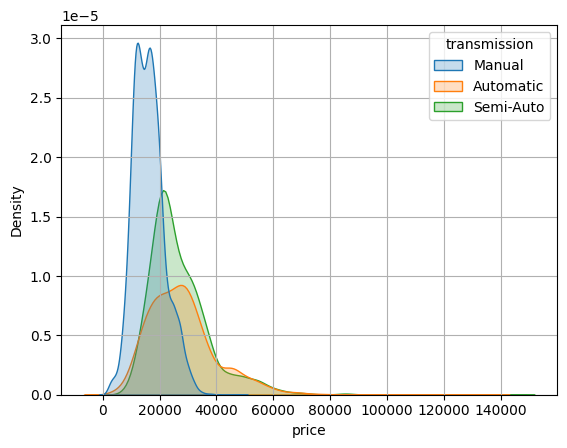

In [8]:
sns.kdeplot(df,x='price',hue='transmission',shade=1)
plt.grid(0.7)
plt.show()

<Figure size 1200x800 with 0 Axes>

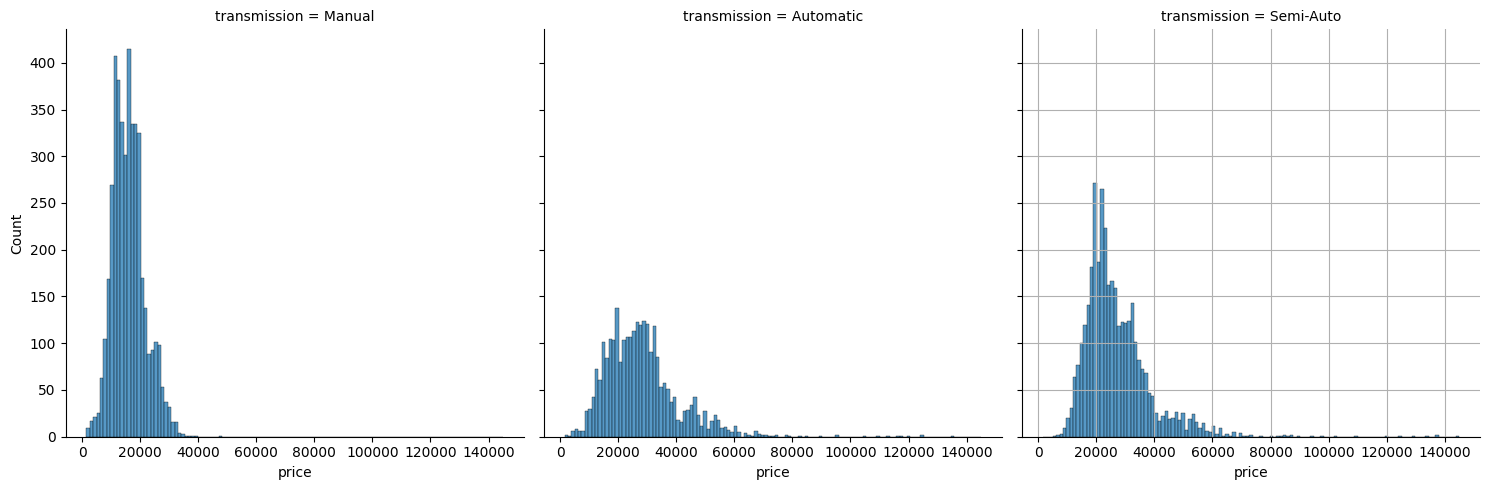

In [9]:
plt.figure(figsize=(12,8))
sns.displot(df,x=df['price'],col='transmission',aspect=1,multiple='stack')
plt.grid()
plt.show()

In [10]:
df['transmission'] = df['transmission'].map({"Manual":0,"Semi-Auto":1,"Automatic":2})
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,0,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,2,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,0,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,2,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,0,1998,Petrol,145,49.6,1.0


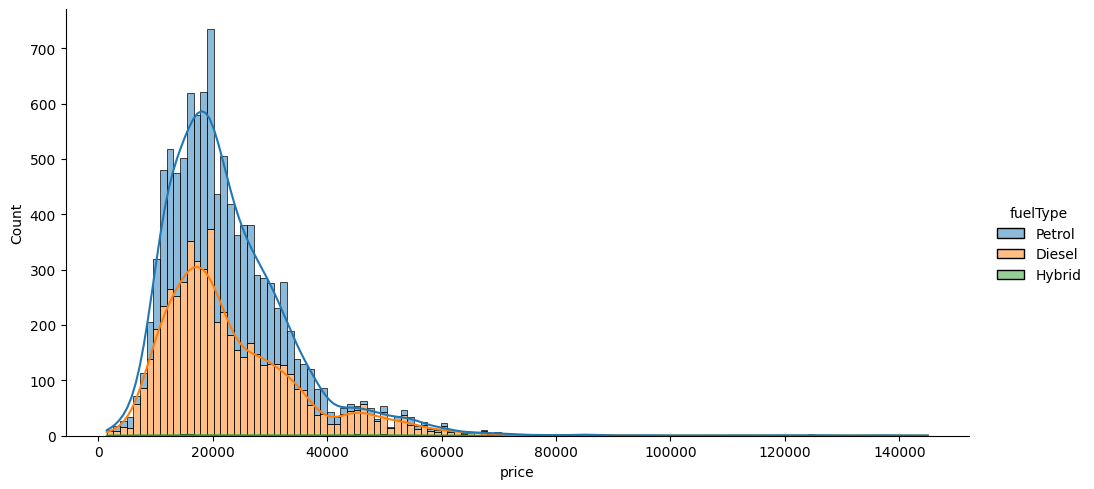

In [11]:
sns.displot(df,x='price',kde=True,aspect=2,hue='fuelType',multiple='stack')
plt.show()

In [12]:
df['fuelType'] = df['fuelType'].map({"Diesel":1,"Petrol":2,"Hybrid":0})
df.sample()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
720,A1,2019,23995,1,1952,2,145,44.1,1.0


In [13]:
df['price'].corr(df['fuelType'])

-0.036633266470806544

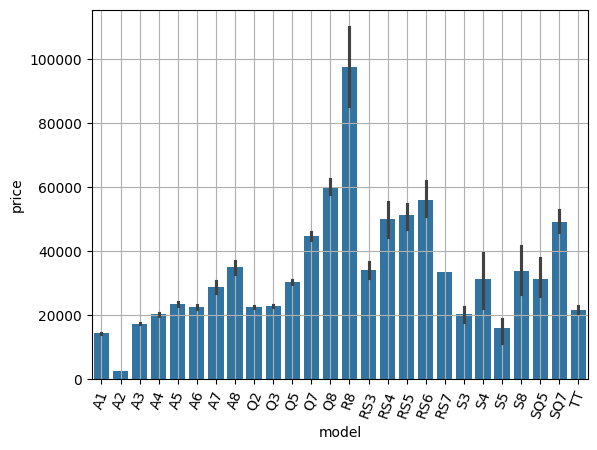

In [14]:
sns.barplot(data=df,x=df['model'].sort_index(),y=df['price'],order=df['model'].sort_values())
plt.xticks(rotation=70)
plt.grid(1)
plt.show()

In [15]:
ord = OrdinalEncoder()
df['model'] = ord.fit_transform(df[['model']])
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,0.0,2017,12500,0,15735,2,150,55.4,1.4
1,5.0,2016,16500,2,36203,1,20,64.2,2.0
2,0.0,2016,11000,0,29946,2,30,55.4,1.4
3,3.0,2017,16800,2,25952,1,145,67.3,2.0
4,2.0,2019,17300,0,1998,2,145,49.6,1.0


In [16]:
df['model'].corr(df['price'])

0.39463546915381137

In [17]:
df.sample(5)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
7890,3.0,2016,14950,0,22000,2,145,51.4,1.4
4354,10.0,2019,35995,1,4306,1,150,38.2,2.0
7175,9.0,2017,22400,1,17313,2,145,42.2,2.0
9614,9.0,2020,28490,0,10,2,145,39.8,1.5
8764,3.0,2017,13500,0,25000,2,125,53.3,1.4


In [18]:
df.corr()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
model,1.000000,0.056775,0.394635,0.180233,-0.068694,-0.048901,0.393301,-0.408770,0.369126
year,0.056775,1.000000,0.592581,0.227061,-0.789667,0.119869,0.093066,-0.351281,-0.031582
price,0.394635,0.592581,1.000000,0.441052,-0.535357,-0.036633,0.356157,-0.600334,0.591262
transmission,0.180233,0.227061,0.441052,1.000000,-0.180980,-0.104144,0.330969,-0.348615,0.385790
mileage,-0.068694,-0.789667,-0.535357,-0.180980,1.000000,-0.239618,-0.166547,0.395103,0.070710
fuelType,-0.048901,0.119869,-0.036633,-0.104144,-0.239618,1.000000,0.106313,-0.357648,-0.363532
tax,0.393301,0.093066,0.356157,0.330969,-0.166547,0.106313,1.000000,-0.635909,0.393075
mpg,-0.408770,-0.351281,-0.600334,-0.348615,0.395103,-0.357648,-0.635909,1.000000,-0.365621
engineSize,0.369126,-0.031582,0.591262,0.385790,0.070710,-0.363532,0.393075,-0.365621,1.000000


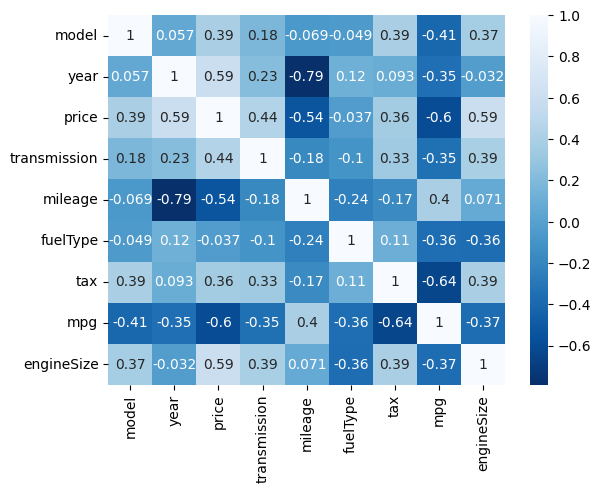

In [19]:
sns.heatmap(df.corr(),annot=True,cmap='Blues_r')
plt.show()

In [20]:
x_data = df.drop('price',axis=1)
y_data = df['price']

In [21]:
print(x_data.shape)
print(y_data.shape)

(10668, 8)
(10668,)


In [22]:
standart = StandardScaler()
x_data = standart.fit_transform(x_data)

In [88]:
x_train,x_test,y_train,y_test = train_test_split(x_data,y_data,test_size=0.25,random_state=32)

In [89]:
print("TRAIN DATA")
print(x_train.shape)
print(y_train.shape)

TRAIN DATA
(8001, 8)
(8001,)


In [90]:
print("TEST DATA")
print(x_test.shape)
print(y_test.shape)

TEST DATA
(2667, 8)
(2667,)


* `LinearRegression`

In [91]:
lin_model = LinearRegression()
lin_model.fit(x_train,y_train)

LinearRegression()

In [92]:
y_pred = lin_model.predict(x_test)

In [93]:
print('Mean squared error: ',mean_squared_error(y_test,y_pred))
print("Mean absolute error: ",mean_absolute_error(y_test,y_pred))
print("R2 score: ",r2_score(y_test,y_pred))

Mean squared error:  28596722.903442465
Mean absolute error:  3381.1692444394093
R2 score:  0.8001209498774124


In [94]:
result = cross_val_score(lin_model,x_test,y_test,cv=5)
print("Cross-validated Scores:", result)
print("Mean Score:", result.mean())
print("Standard Deviation of Scores:", result.std(ddof=0))

Cross-validated Scores: [0.80431054 0.77794346 0.78752484 0.7863819  0.79176433]
Mean Score: 0.7895850155192196
Standard Deviation of Scores: 0.00862114274838695


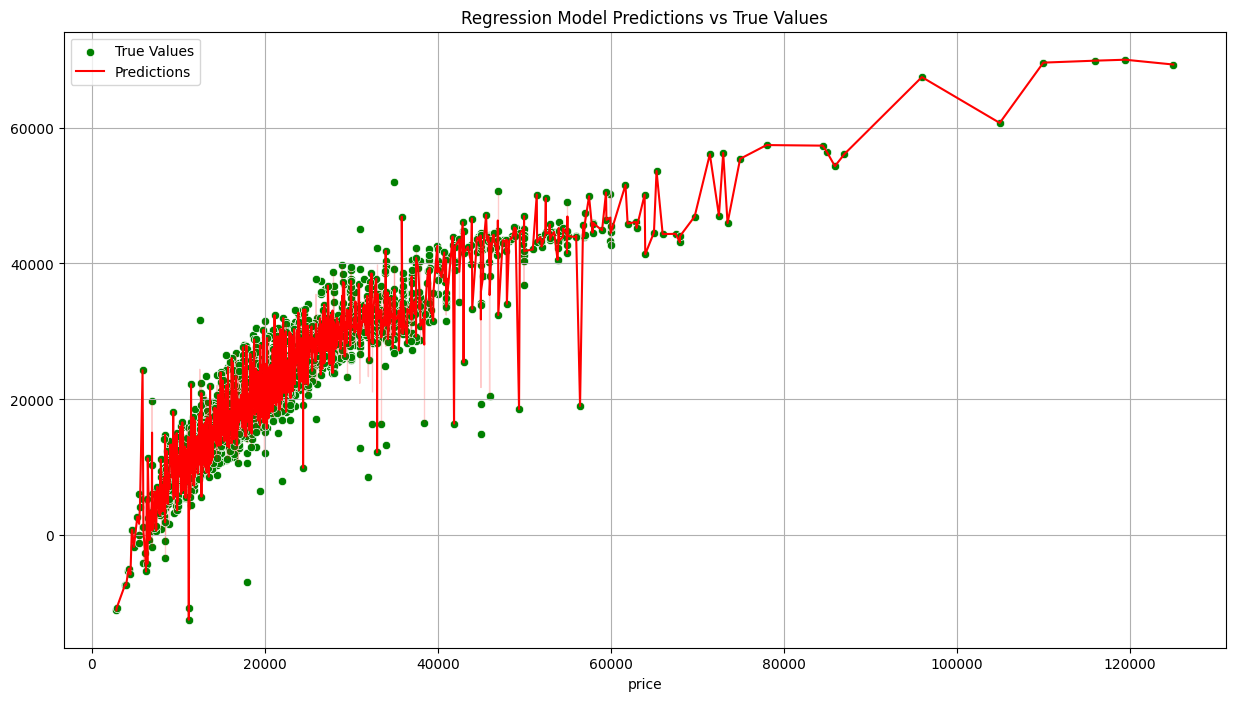

In [95]:
plt.figure(figsize=(15,8))
sns.scatterplot(x=y_test,y=y_pred,color='green',label='True Values')
sns.lineplot(x=y_test,y=y_pred,color='red', label='Predictions')
plt.title('Regression Model Predictions vs True Values')
plt.legend()
plt.grid()
plt.show()

* `KNN`

In [96]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(x_train,y_train)

KNeighborsRegressor()

In [97]:
k_predict = knn.predict(x_test)

In [98]:
print('Mean squared error: ',mean_squared_error(y_test,k_predict))
print("Mean absolute error: ",mean_absolute_error(y_test,k_predict))
print("R2 score: ",r2_score(y_test,k_predict))

Mean squared error:  8235968.298462692
Mean absolute error:  1829.6128983877013
R2 score:  0.9424340500170284


In [99]:
result = cross_val_score(knn,x_test,y_test,cv=5)
print("Cross-validated Scores:", result)
print("Mean Score:", result.mean())
print("Standard Deviation of Scores:", result.std(ddof=0))

Cross-validated Scores: [0.92504951 0.88362135 0.91974565 0.91324754 0.89754636]
Mean Score: 0.9078420819733306
Standard Deviation of Scores: 0.015229283544589566


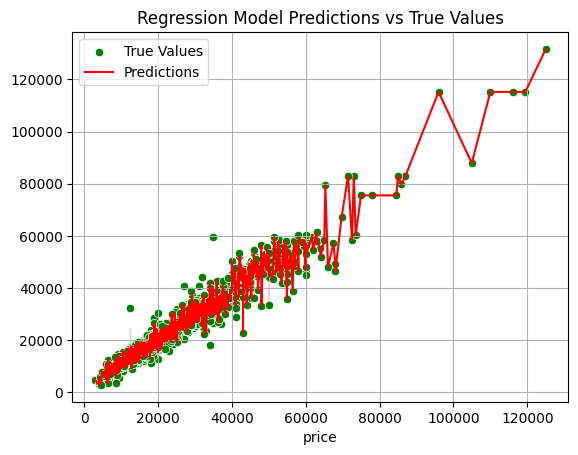

In [100]:
sns.scatterplot(x=y_test,y=k_predict,color='green',label='True Values')
sns.lineplot(x=y_test,y=k_predict,color='red', label='Predictions')
plt.title('Regression Model Predictions vs True Values')
plt.legend()
plt.grid()
plt.show()

* `DecisionTreeRegressor`

In [101]:
dt = DecisionTreeRegressor(min_samples_split=2,min_samples_leaf=10)
dt.fit(x_train,y_train)

DecisionTreeRegressor(min_samples_leaf=10)

In [102]:
dt_predict = dt.predict(x_test)

In [103]:
print('Mean squared error: ',mean_squared_error(y_test,dt_predict))
print("Mean absolute error: ",mean_absolute_error(y_test,dt_predict))
print("R2 score: ",r2_score(y_test,dt_predict))

Mean squared error:  9463781.852196082
Mean absolute error:  1928.491929103073
R2 score:  0.9338521503470377


In [104]:
result = cross_val_score(dt,x_test,y_test,cv=5)
print("Cross-validated Scores:", result)
print("Mean Score:", result.mean())
print("Standard Deviation of Scores:", result.std(ddof=0))

Cross-validated Scores: [0.88045588 0.84063474 0.87093302 0.86410096 0.8703499 ]
Mean Score: 0.8652949011019875
Standard Deviation of Scores: 0.013392131320313317


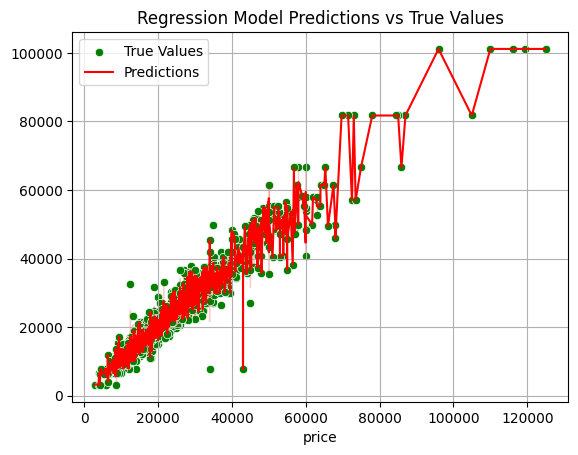

In [105]:
sns.scatterplot(x=y_test,y=dt_predict,color='green',label='True Values')
sns.lineplot(x=y_test,y=dt_predict,color='red', label='Predictions')
plt.title('Regression Model Predictions vs True Values')
plt.legend()
plt.grid()
plt.show()

* `ExtraTreesRegressor`

In [107]:
ext = ExtraTreesRegressor()
ext.fit(x_train,y_train)

ExtraTreesRegressor()

In [108]:
ext_pred = ext.predict(x_test)

In [109]:
print('Mean squared error: ',mean_squared_error(y_test,ext_pred))
print("Mean absolute error: ",mean_absolute_error(y_test,ext_pred))
print("R2 score: ",r2_score(y_test,ext_pred))

Mean squared error:  6048604.409007636
Mean absolute error:  1594.306051051654
R2 score:  0.957722802437121


In [110]:
result = cross_val_score(ext,x_test,y_test,cv=5)
print("Cross-validated Scores:", result)
print("Mean Score:", result.mean())
print("Standard Deviation of Scores:", result.std(ddof=0))

Cross-validated Scores: [0.96492936 0.93242482 0.94138509 0.94284981 0.95496768]
Mean Score: 0.9473113544008868
Standard Deviation of Scores: 0.011363521508835392


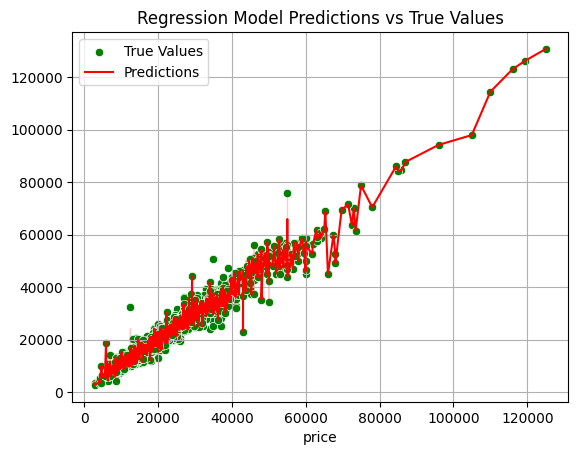

In [111]:
sns.scatterplot(x=y_test,y=ext_pred,color='green',label='True Values')
sns.lineplot(x=y_test,y=ext_pred,color='red', label='Predictions')
plt.title('Regression Model Predictions vs True Values')
plt.legend()
plt.grid()
plt.show()

* `RandomForestRegressor`

In [132]:
rf = RandomForestRegressor(min_samples_split=10,min_samples_leaf=10)
rf.fit(x_train,y_train)

RandomForestRegressor(min_samples_leaf=10, min_samples_split=10)

In [133]:
rf_pred = ext.predict(x_test)

In [135]:
print('Mean squared error: ',mean_squared_error(y_test,rf_pred))
print("Mean absolute error: ",mean_absolute_error(y_test,rf_pred))
print("R2 score: ",r2_score(rf_pred,y_test))

Mean squared error:  6048604.409007636
Mean absolute error:  1594.306051051654
R2 score:  0.9555709342503572


In [136]:
result = cross_val_score(rf,x_test,y_test,cv=5)
print("Cross-validated Scores:", result)
print("Mean Score:", result.mean())
print("Standard Deviation of Scores:", result.std(ddof=0))

Cross-validated Scores: [0.88093411 0.8918682  0.9073124  0.9062488  0.86082223]
Mean Score: 0.8894371483989028
Standard Deviation of Scores: 0.0173157834518432


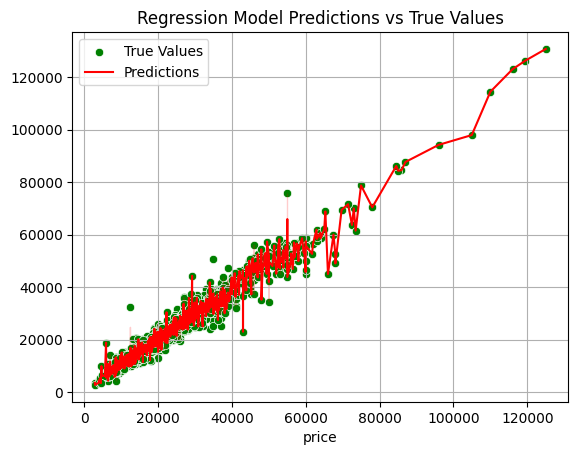

In [116]:
sns.scatterplot(x=y_test,y=rf_pred,color='green',label='True Values')
sns.lineplot(x=y_test,y=rf_pred,color='red', label='Predictions')
plt.title('Regression Model Predictions vs True Values')
plt.legend()
plt.grid()
plt.show()